# 3. Explore the data & using data to answer meaningful Question (EDA)

In [1]:
# import library
import pandas as pd
from datetime import datetime
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots

### First, let's read our data and take a quick view

In [2]:
data = pd.read_csv('data\cleaned_data.csv')
data.head(5)

,CARNAME,ID,Make,Model,Body color,Interior color,Interior material,Body,Doors,Seats,...,CO2 emissions(g/km),Emission class,Mileage(km),First registration,Condition,Consumption(l/100km or kWh/100km),Price(EUR),Tags,Engine capacity(ccm),Previous owners
0,hyundai kona,61032325,Hyundai,Kona,Grey,Black interior,Full leather interior,SUV / offroad,4/5 doors,5.0,...,0,No emission class,10,2023-09-01,New,5.908385,53099,Ventilated front seats; Heated rear seats; Par...,1499.0,0.0
1,volkswagen up!,61032250,Volkswagen,up!,Black,Other interior color,Cloth interior,Hatchback,4/5 doors,4.0,...,112,Euro 6d,35,2023-09-01,New,5.500000,27749,Heated front seats; Bluetooth; Automatic A/C; ...,999.0,0.0
2,seat ibiza,61032203,Seat,Ibiza,Black,Grey interior,Cloth interior,Hatchback,4/5 doors,5.0,...,110,Euro 6,2855,2023-06-01,Demonstration car,4.800000,27549,LED headlights; Digital cockpit; Keyless entry...,999.0,0.0
3,ford kuga,61032104,Ford,Kuga,Silver,Black interior,Cloth interior,SUV / offroad,4/5 doors,5.0,...,125,Euro 6d,8,2023-04-01,New,6.600000,37249,Heated rear seats; LED headlights; Digital coc...,1496.0,1.0
4,dodge nitro,61032099,Dodge,Nitro,White,Black interior,Full leather interior,SUV / offroad,4/5 doors,5.0,...,288,Euro 4,158863,2011-04-01,Used,12.100000,14799,Electric adjustable front seats; Heated front ...,3952.0,2.0


- Check Dtype of columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CARNAME                            2293 non-null   object 
 1   ID                                 2293 non-null   int64  
 2   Make                               2293 non-null   object 
 3   Model                              2293 non-null   object 
 4   Body color                         2293 non-null   object 
 5   Interior color                     2293 non-null   object 
 6   Interior material                  2293 non-null   object 
 7   Body                               2293 non-null   object 
 8   Doors                              2293 non-null   object 
 9   Seats                              2293 non-null   float64
 10  Fuel                               2293 non-null   object 
 11  Transmission                       2293 non-null   objec

# 3.1 Exploratory data analysis: Analyze, identify patterns, and explore the data.

## 3.1.1 Numerical analysis using descriptive statistics

Descriptive statistics show the characteristics of numerical features. It shows us the information such as:
- The mean (and you can go further with advanced techiques as Arithmetic mean, Geometric mean, Harmonic mean)
- The median
- The mode
- Quantiles (Quartiles, Percentiles, Deciles, Crocodiles?)
- Range and IQR (Interquartile Range) (you might find that its relation to box plots)


In [4]:
# Tạo bản sao của clean_df
df_copy = data.copy()
# # Chỉ giữ lại các cột có kiểu dữ liệu là int hoặc float
df_copy = df_copy.select_dtypes(include=['int64', 'float64'])
# Because dtype of "ID" is int, but this column is meaningless, so i also drop it.
df_copy = df_copy.drop(['ID'], axis=1)


df_analyze = df_copy.describe()
# Tính IQR
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1

# Thêm IQR vào cuối df_analyze
df_analyze.loc['IQR'] = IQR

df_analyze

,Seats,Power(kW),CO2 emissions(g/km),Mileage(km),Consumption(l/100km or kWh/100km),Price(EUR),Engine capacity(ccm),Previous owners
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,4.905364,131.575229,108.428696,37857.470126,5.908385,37116.182730,1704.461774,0.484954
std,0.726122,77.668851,63.398122,40990.258289,2.334615,34042.486755,704.612149,0.653468
min,2.000000,33.000000,0.000000,0.000000,0.800000,5399.000000,830.000000,0.000000
25%,5.000000,85.000000,97.000000,150.000000,4.700000,20899.000000,1332.000000,0.000000
50%,5.000000,110.000000,117.000000,25000.000000,5.500000,29399.000000,1499.000000,0.000000
75%,5.000000,150.000000,137.000000,62000.000000,6.000000,42199.000000,1968.000000,1.000000
max,7.000000,750.000000,394.000000,174215.000000,32.000000,692499.000000,6749.000000,5.000000
IQR,0.000000,65.000000,40.000000,61850.000000,1.300000,21300.000000,636.000000,1.000000


**Comment**:

The descriptive statistics provides an overview of the characteristics of numerical data:
- Count: Each variable has 2289.00000 observations, indicating that the dataset has sufficient data for analysis.
- Mean: Indicates the average value of each variable. For example, the average power (Power(kW)) is 131.53421.
- Standard Deviation (std): Shows the level of dispersion of the data around the mean. For 'CO2 emissions(g/km)', the standard deviation is 63.392364, meaning there is significant variation in emissions.
- Minimum and Maximum: Shows the smallest and largest values of each variable.
- Quartiles (25%, 50%, 75%): Provides points dividing the data into four equal parts. 50% is also known as the median.
- Range: Calculated by subtracting the smallest value from the largest value.
- Interquartile Range (IQR): It is the difference between the third quartile (Q3) and the first quartile (Q1), helping to determine the spread of 50% of the data in between. In the table, the IQR for 'Seats' is 0.00000, which could indicate either no dispersion in this data or some ambiguity in the data.

## 3.1.2 Describe the correlation between features in the dataset

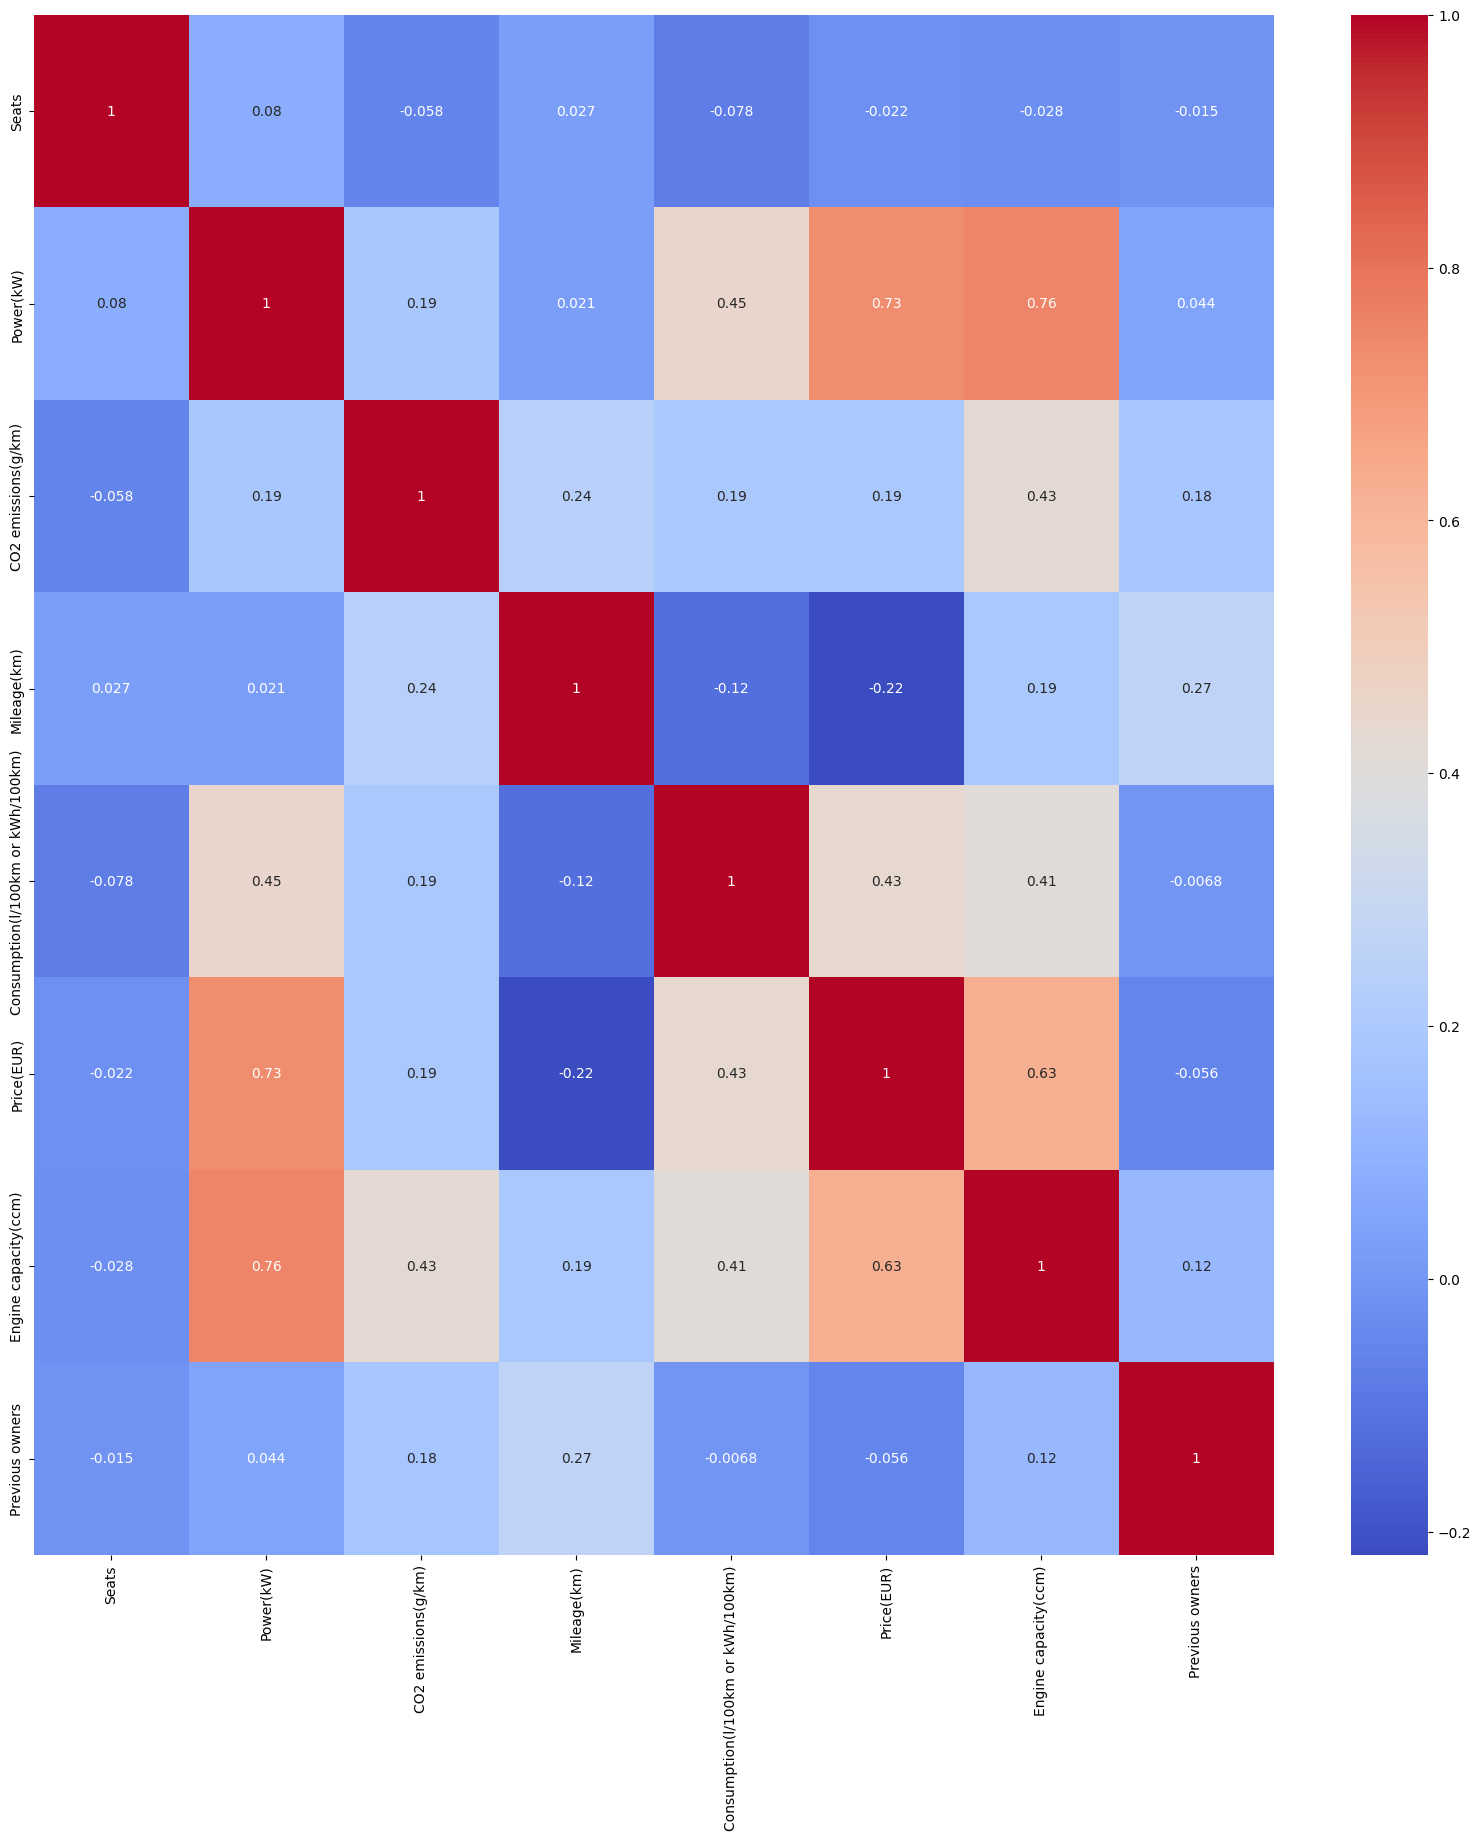

In [5]:

corr_matrix = df_copy.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', cbar = True)
plt.show()

**Comment:**
- Between Power and Engine capacity, Power and Price, there is a strong positive correlation, meaning that the stronger the engine, the larger its capacity, and the higher the pric.
- Notice that Seats have the weakest relationship, almost a predominantly negative correlation, but not overly strong.

### **Question 01:** How does the correlation between different vehicle specifications vary across the top 10 cars with the highest price(EUR)?

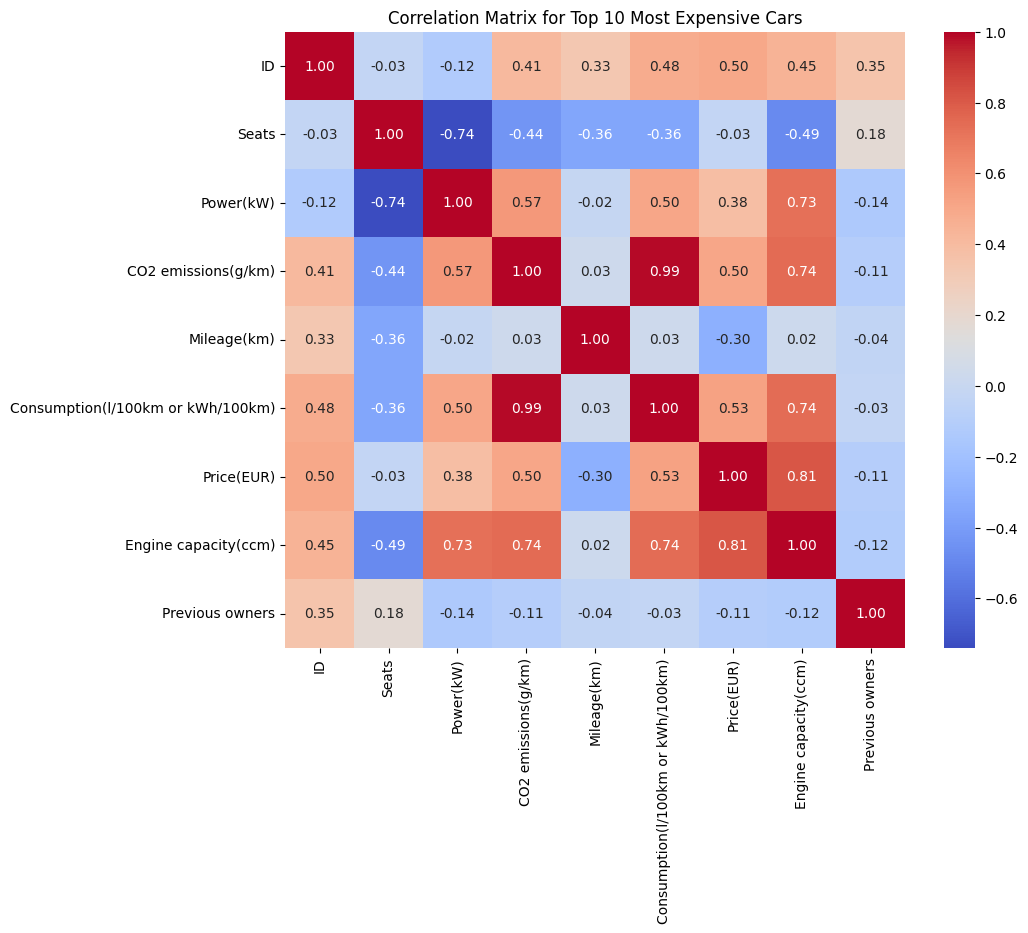

In [6]:
# Chọn ra 10 xe có giá cao nhất
top_10_expensive_cars = data.nlargest(10, 'Price(EUR)')

# Chọn tất cả các cột chứa thông số chi tiết của xe ở dạng numeric
vehicle_specifications = top_10_expensive_cars.select_dtypes(include=np.number)

# Tính ma trận tương quan
correlation_matrix = vehicle_specifications.corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Top 10 Most Expensive Cars")
plt.show()

**Comment:**

- ID and other attributes: The correlation between ID and other attributes is unclear, possibly because the ID does not reflect any specific characteristics of the car and is merely an identification label.
- Seats: There is a strong negative correlation (-0.74) between the number of seats and power. It can be inferred that cars with higher power typically have fewer seats. There is also a negative correlation with engine capacity (-0.49), suggesting that cars with fewer seats might be sportier or high-performance models with larger engines.
- Power: There is a strong positive correlation with CO2 emissions (0.57), indicating that cars with higher power tend to emit more CO2.
- CO2 emissions: There is a strong positive correlation (1.00) with itself as expected, and other correlations are not significant.
- Battery warranty and Battery capacity: There is no data available to assess their correlation.
- Mileage: There is a strong positive correlation (1.00) with itself and a slight negative correlation with price (-0.30), suggesting that cars with higher mileage tend to have lower prices.
- Price: Apart from a positive correlation with engine capacity (0.81), price also has a slight negative correlation with the number of seats (-0.30). This might imply that more expensive cars might have fewer seats, akin to premium sports models.
- Engine capacity: There is a positive correlation with power (0.73) and CO2 emissions (0.74), indicating that cars with larger engines are typically more powerful and emit more.
- Previous owners: There are very few notable correlations with other attributes.
- Weight: There is a perfect positive correlation (1.00) with itself but no strong correlation with other attributes.

### **Question 02:** How does the mileage (km) vary concerning the number of previous owners, fuel type for cars which is used in the dataset?

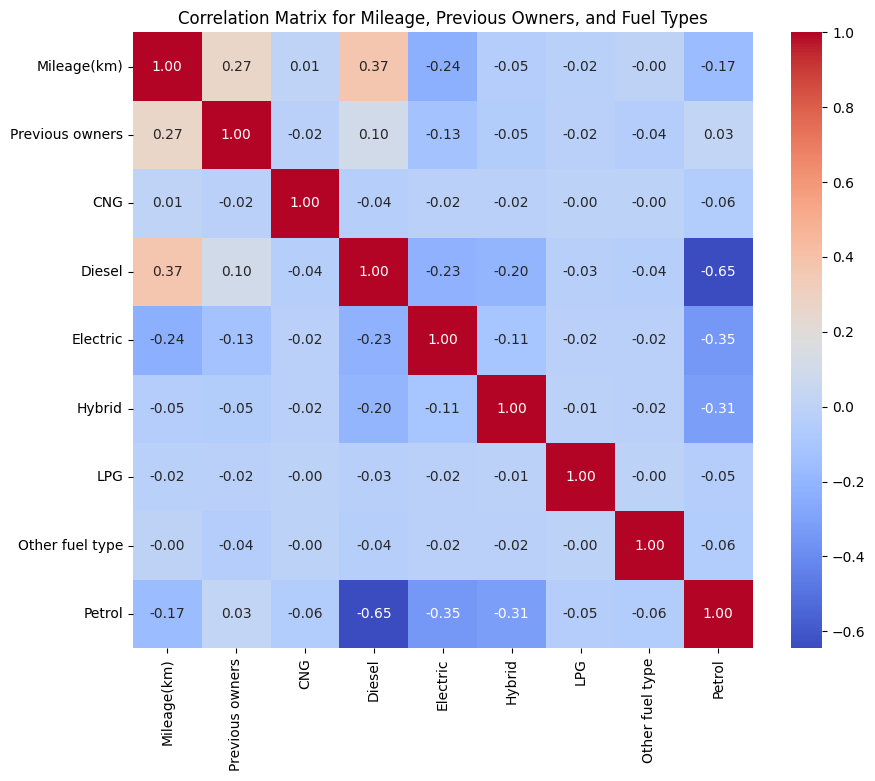

In [7]:
# Tạo một bản sao của clean_df
copy1_df = data.copy()

# Thực hiện One-Hot Encoding cho cột 'Fuel'
encoded_fuel = pd.get_dummies(copy1_df['Fuel'])

# Thêm các cột mã hóa vào DataFrame copy1_df
copy1_df = pd.concat([copy1_df, encoded_fuel], axis=1)

# Xóa cột 'Fuel' gốc vì đã được mã hóa thành các cột mới
copy1_df.drop('Fuel', axis=1, inplace=True)

# Tương tự, thực hiện xử lý cho các cột 'Consumption' và 'First registration'

# Chọn các cột quan tâm, bao gồm cả các cột đã mã hóa
columns_of_interest = ['Mileage(km)', 'Previous owners'] + list(encoded_fuel.columns)

# Tạo DataFrame mới từ các cột quan tâm
data_of_interest = copy1_df[columns_of_interest]

# Tính ma trận tương quan
correlation_matrix = data_of_interest.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Mileage, Previous Owners, and Fuel Types")
plt.show()

**Comment:**

- Mileage and Diesel: There is a strong positive correlation (0.37) between mileage and vehicles running on diesel. This might indicate that diesel cars are typically used for longer distances or have higher vehicle age.
- Petrol and Diesel: There is a strong negative correlation (-0.65) between petrol and diesel cars. This might reflect consumer tendencies to opt for either petrol or diesel, rather than both.
- Electric and Mileage: There's a slight negative relationship (-0.23) between electric cars and mileage, possibly indicating that electric cars are either newer or primarily used in urban settings with shorter distances.
- Hybrid and Other Fuel Types: A slight negative relationship (-0.20) between hybrid cars and other fuel types might suggest that hybrids are less likely to use fuel other than petrol or electricity.
- LPG and Other Fuel Types: Both fuel types have very weak relationships with other attributes, indicating that they might not be prevalent or particularly relevant concerning the mileage covered or the number of previous owners.

## 3.1.3 Some questions to explore relationship between variables

### **Question 1:** What is the average power of vehicles for each fuel type?

In [8]:
# Tính trung bình công suất cho từng loại nhiên liệu
average_power_by_fuel = data.groupby('Fuel')['Power(kW)'].mean().reset_index()

# Biểu đồ cột hiển thị trung bình công suất theo loại nhiên liệu
fig = px.bar(average_power_by_fuel, x='Fuel', y='Power(kW)', title='Average Power by Fuel Type')
fig.update_xaxes(categoryorder='total descending')  # Sắp xếp loại nhiên liệu theo thứ tự giảm dần của công suất trung bình
fig.show()

**Comment:**

- Electric cars display the highest average power among different fuel types, as depicted by the tallest bar in the chart. This reflects the ability of electric cars to deliver substantial power right from the start.
- Hybrid cars have the second-highest average power, lower than electric vehicles but still higher than other traditional fuel types.
- Diesel and petrol (gasoline) cars exhibit similar power levels, both sitting at an average level among the compared fuel types. This reflects the widespread use of both fuel types in modern car models.
- The "Other fuel type" category demonstrates lower power compared to diesel and petrol, possibly encompassing alternative fuels not separately listed.
- CNG and LPG showcase the lowest average power, represented by the shortest bars in the chart. This might indicate their limited prevalence in high-powered car models or that they are fuel-efficient types intended for different purposes.

### **Question 2:** How does the engine capacity and power relate to CO2 emissions?

In [9]:
# Biểu đồ scatter plot để quan sát mối quan hệ giữa công suất, dung tích động cơ và CO2 emission
fig = px.scatter(data, x='Engine capacity(ccm)', y='Power(kW)', color='CO2 emissions(g/km)',
                 title='Relationship between Engine Capacity, Power, and CO2 Emissions')
fig.show()

**Comment:**
- Engine Capacity and Power: There seems to be a trend of increasing power as the engine capacity rises, demonstrated by the points tending to move higher on the power axis as the engine capacity becomes larger.
- CO2 Emissions and Engine Capacity: While there's no clear trend for all points, it appears that some cars with larger engine capacities (around 3000 ccm and above) transition towards a yellow hue, indicating potentially higher CO2 emissions.
- Power Distribution: The distribution of power seems quite broad, with the majority of cars concentrated in the range from 0 to around 200 kW. However, there are some points at very high power levels, reaching up to 800 kW, which do not necessarily correlate with extremely large engine capacities.
- Outliers: There are some points lying far apart from the majority of other points, which might indicate vehicles with significantly different technical characteristics, such as high-powered sports cars or specialized vehicles.

# 3.2 Using data to anwer meaningful Question

## Question 1: With each price segment, how different are the Power of Electric, Hybrid and traditional fuel cars? 

- Benefits of the question:
    - Helps users easily compare the engine **power** of three **types of vehicles** in the same **price range**.
    - Helps users find a vehicle with the desired power, suitable for their needs.
- How to answer the question by using data?
    - Use a line chart, with the x-axis as price bins and the y-axis as engine power to easily see the difference.

### Step1: Preprocess data to answer the question 

- Due to unique value of the `Fuel` column are: 'Electric', 'Petrol', 'Hybrid', 'Diesel', 'LPG', 'CNG' and 'Other fuel type'. We only care about 
the Fuel type Electric, Hybrid and Fossil Fuel, so
    - I will drop any car that has 'Other fuel type'.
    - Turn 'Petrol','Diesel', 'LPG', 'CNG' to "Fossil".
- Because the data has outliers (for luxury/hyper sport cars), and the number of these cars is very small, I will handle outliers by removing values outside the 95% confidence interval to avoid losing important information.

In [10]:
Fuel_Info = data[["Price(EUR)","Power(kW)","Fuel"]].copy()


# Turn 'Petrol','Diesel', 'LPG', 'CNG' to "Fossil"
Fuel_Info['Fuel'].replace(['Petrol', 'Diesel', 'LPG', 'CNG'], 'Fossil', inplace=True)

# drop any car that has 'Other fuel type'.
Fuel_Info = Fuel_Info[Fuel_Info['Fuel'] != 'Other fuel type']



# Calculate upper_bound_price, base on 95% confidence interval
lower_bound_price = Fuel_Info['Price(EUR)'].quantile(0.025)
upper_bound_price = Fuel_Info['Price(EUR)'].quantile(0.975)
upper_bound_price = np.floor(upper_bound_price / 10000) * 10000

print (Fuel_Info.Fuel.value_counts()) 
print(upper_bound_price)

Fuel
Fossil      1832
Electric     248
Hybrid       205
Name: count, dtype: int64
100000.0


### Step 2: Visualize with line chart 

- Because the supercars will be excluded from the 95% confidence interval, I will divide the bins into two ranges: 
    - bin1: for values within the confidence interval - representing the majority of cars
    - bin2: for outlier values - representing the expensive cars.

In [11]:
# Define bins for the two ranges
bins1 = np.arange(10000, upper_bound_price, 10000)
bins2 = np.array([upper_bound_price, np.floor(Fuel_Info["Price(EUR)"].max() / 10000) * 10000  ])

# Combine the two bin arrays
bins = np.concatenate((bins1, bins2))

# Create a new column for price bins
Fuel_Info['Price_bin'] = pd.cut(Fuel_Info['Price(EUR)'], bins=bins)

# Calculate the average power for each fuel type and price bin
average_power = Fuel_Info.groupby(['Fuel', 'Price_bin'])['Power(kW)'].mean().unstack()

# Create the line chart for each fuel type
fig = go.Figure()
for i, fuel_type in enumerate(average_power.index):
    fig.add_trace(go.Scatter(x=[f'{int(left)}-{int(right)}' for left, right in zip(bins[:-1], bins[1:])], 
                             y=average_power.loc[fuel_type], 
                             mode='lines', 
                             name=fuel_type))

fig.update_layout(title='AVG Power for each type of Vehicle in each Price range',
                  xaxis_title='Price (EUR)',
                  yaxis_title='Power (kW)',
                  height = 800,
                  )

fig.show()

**Comment**
- We can see that, in most price ranges (20000 to 80000), Hybrid cars have significantly more engine power than Electric and Fossil fuel cars. 
- In the higher segment (> 80000), Electric cars will have a significant power difference compared to the other two types of cars.


## Question 2: The 6 most common special functions and their impact on average price 

- Benefits of the question:
    - Helps to identify the necessary modern functions of a car.
    - Find out the impact of these functions on the car price, help buyers to consider whether to buy a car with that feature or not.
- How to answer the question by using data?
    - From the `Tags` column which is a multiple value column, separate the functions and perform one-hot encoding.
    - Calculate the average price for cars equipped with that function.

### Step 1: One-hot encoding for the top 6 most frequent special functions 

In [12]:

one_hot_df =  data[["Price(EUR)","Tags"]].copy()

# Get each tag in each multiple value row
tags = one_hot_df['Tags'].str.split('; ', expand=True)

# Stack to make the DataFrame long, then get_dummies and group by index before summing
get_dummy = pd.get_dummies(tags.stack()).groupby(level=0).sum()
# Find the top 5 most frequent tags
top_6_tags = get_dummy.sum().nlargest(6).index
# Select only the top 5 most frequent tags
get_dummy = get_dummy[top_6_tags]
# Join the one-hot encoded DataFrame back to the original DataFrame
one_hot_df = one_hot_df.join(get_dummy)

# Drop the `Tags` because we dont need it anymore
one_hot_df = one_hot_df.drop("Tags",axis=1)


print(one_hot_df.columns)
for tag in top_6_tags:
    print(f"{tag}: {get_dummy[tag].sum()}")

Index(['Price(EUR)', 'Heated front seats', 'LED headlights',
       'Navigation system', 'Apple CarPlay', 'Android auto', 'Bluetooth'],
      dtype='object')
Heated front seats: 1391
LED headlights: 1175
Navigation system: 1078
Apple CarPlay: 1074
Android auto: 986
Bluetooth: 968


### Step 2: Draw a bar chart 


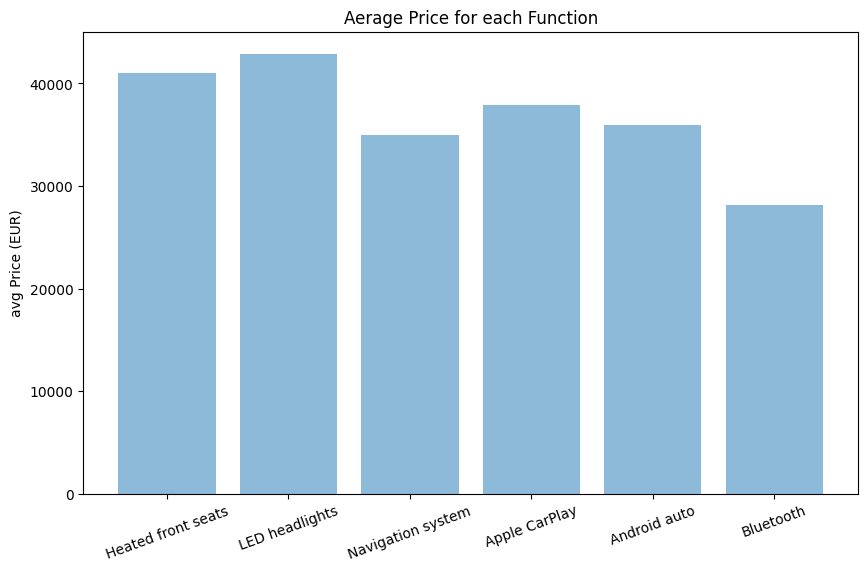

In [13]:
# Calculate the average price for each feature
average_prices = {tag: one_hot_df.loc[one_hot_df[tag] == 1, 'Price(EUR)'].mean() for tag in top_6_tags}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_prices.keys(), average_prices.values(), align='center', alpha=0.5)
plt.xticks(rotation=20)
plt.ylabel('avg Price (EUR)')
plt.title('Aerage Price for each Function')

plt.show()

- We can see that cars equipped with “Heated front seat” and “Led headlights” have a relatively high average price (>= 40000). 
- The average price of cars equipped with “Bluetooth” and “Navigation system” is quite low compared to other equipment, possibly because these features have been around for a long time.
- Finally, cars equipped with “Apple CarPlay” and “Android auto” usually cost from 35000 to under 40000. Due to the popularity of phones, cars with these features are not too expensive to suit many customers.

## Question 3: Is there a significant performance difference among cars at different price ranges?
Looking at the prices, we can observe a substantial difference between the prices of various cars. For example, 75% of the cars are priced below 42k EUR, while the remaining 25% reach up to 600k EUR. This is not a df input error but rather a characteristic of the automotive goods market, where there is significant fluctuation among brands and models.

To analyze whether the price differences correspond to significant performance variations, we can employ the following strategies:

- **Benefits of the question**:
Answering this question helps clarify whether quality aligns with quantity, addressing the crucial balance between affordability and performance. It aids consumers in making informed decisions, ensuring they acquire products that meet their performance requirements while remaining within their budget.

- **How to answer the question by using data?**

    - Boxplot Analysis: Identify "normal" price ranges and outliers with significantly higher prices using boxplots. Evaluate price distribution within different segments to understand data spread.

    - Technical Specifications Analysis: Explore key parameters (horsepower, fuel efficiency, acceleration, etc.)and compare them across price ranges. Create radar charts for visual comparison of performance metrics at different price points.
            
    - Additional Technical Parameters: Analyze seating capacity, vehicle type, etc., to understand trends among different car types at distinct price levels.
        

Firstly, we need to observe the distribution of cars based on price to divide them into appropriate price ranges. We will use a boxplot to visualize the distribution of cars according to their prices.

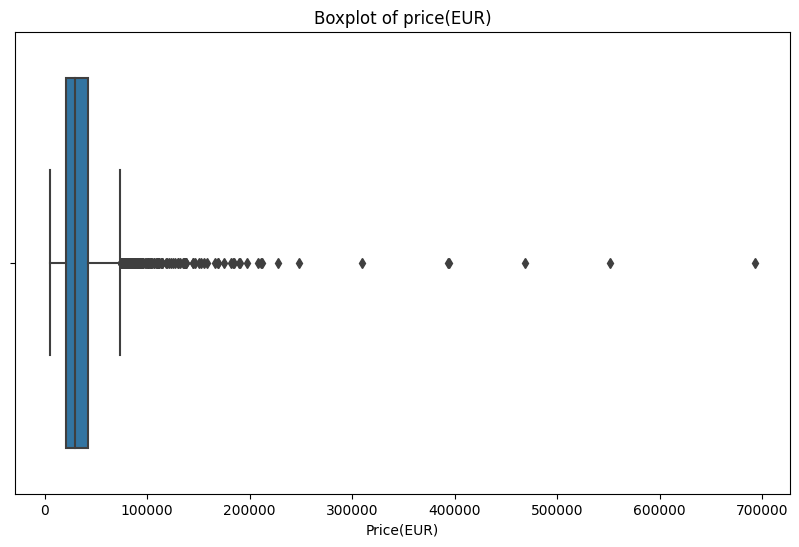

In [14]:
#Vẽ boxplot bằng matplotlib cho cột price(EUR)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price(EUR)'])
plt.title('Boxplot of price(EUR)')
plt.show()

From the results above, it is evident that there is a significant difference between the price ranges. We will categorize the data into three subsets:

- Normal price range: 0 - 70k EUR
- Due to substantial outliers, further categorization will be done:
  - High price range: 70k - 200k EUR
  - Very high price range: greater than 200k EUR

In [15]:
df = data.copy()

# Tạo cột mới Type để phân loại giá tiền
threshold_1 = 70000
threshold_2 = 200000
df['Type'] = 'Normal'
df.loc[(df['Price(EUR)'] > threshold_1 ) & (df['Price(EUR)'] < threshold_2), 'Type'] = 'Expensive'

df.loc[df['Price(EUR)'] >= threshold_2, 'Type'] = 'Very Expensive'


# rút gọn tên cột để dễ nhìn
df = df.rename(columns={
    'Power(kW)': 'Power',
    'Consumption(l/100km or kWh/100km)': 'Consumption',
    'CO2 emissions(g/km)': 'CO2 Emissions',
    'Mileage(km)': 'Mileage',
    'Engine capacity(ccm)': 'Engine Capacity'
})


After categorization, we will begin calculating the average performance of cars within each group and visualize the results on a chart.

In [16]:
# Chọn ra các cột thuộc tính sẽ nhận xét
selected_columns = ['Power', 'Consumption', 'CO2 Emissions', 'Mileage', 'Engine Capacity']

# Tính giá trị trung bình cho mỗi loại xe
average_data = df.groupby('Type')[selected_columns].mean().reset_index()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
average_data[selected_columns] = scaler.fit_transform(average_data[selected_columns]) + 0.1 # +0.1 để tránh trường hợp giá trị = 0


# Tạo biểu đồ radar
fig = go.Figure()

for i, row in average_data.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[selected_columns].values.tolist(),
        theta=selected_columns,
        fill='toself',
        name=row['Type']
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1.1]
        )),
    showlegend=True
)

#Thêm title
fig.update_layout(title='Average Specifications of Each Type of Car')

fig.show()


**Comment**

-   Vehicles in the high-priced segment truly excel over other types of vehicles in many aspects. With superior power and engine capacity, these vehicles demonstrate that they are equipped with very powerful engines. However, this results in a larger amount of CO2 emissions and higher fuel consumption than other types of vehicles. Looking at the chart, we see that the mileage in this segment is very low, which could explain why their prices are very high. This suggests that vehicles with lower mileage, which are often newer models, are priced higher due to their superior condition and performance. 

-   High-priced vehicles fall short of very high-priced vehicles in terms of engine metrics, but they excel in terms of CO2 emissions and energy consumption as they consume and emit less. This could be explained by the fact that these vehicles do not require very powerful engines, thus they do not need to use a lot of fuel and do not require a large engine capacity. These vehicles also have higher power metrics compared to low-priced vehicles.

-   Low-priced vehicles have significantly higher mileage compared to vehicles in other categories. This could be a reason why their prices are lower than vehicles in other segments. Vehicles in this segment generally fall short of the other two segments in terms of engine power, but they also consume less energy and emit less CO2.

Next, we will analyze additional parameters to examine the distribution trends of cars within different groups.

In [17]:
columns = ["Seats", "Fuel", "Transmission", "Condition"]

for column in columns:
    # Tạo danh sách các nhóm và các nhãn
    groups = df['Type'].unique()
    labels = df[column].unique()

    # Tạo một biểu đồ cột nhóm
    fig = go.Figure()

    # Vẽ từng cột cho mỗi nhóm
    for i, group in enumerate(groups):
        # Lọc dữ liệu cho mỗi nhóm
        group_data = df[df['Type'] == group]
        
        # Tính toán phần trăm cho mỗi nhãn trong nhóm
        percentages = [group_data[group_data[column] == label].shape[0] / group_data.shape[0] * 100 for label in labels]
        
        # Vẽ cột
        fig.add_trace(go.Bar(
            x=labels, 
            y=percentages, 
            name=str(group),
        ))

    # Đặt nhãn cho các trục và biểu đồ
    fig.update_layout(barmode='group', xaxis_title=column, yaxis_title='Percentage (%)', title=f'Group Bar Chart for {column}')

    # Hiển thị biểu đồ
    fig.show()


-   In terms of seating capacity, vehicles in different price segments have a similar distribution, mainly concentrated in 5-seater and 4-seater categories. The difference is that one-third of the very expensive vehicles only have 2 seats, while there are hardly any 2-seater vehicles in the normal and high price segments.

-   In terms of vehicle type, very expensive vehicles and regular vehicles have a similar distribution: mainly Petrol vehicles, followed by Diesel and Hybrid. Very expensive vehicles are completely absent in the electric vehicle category, 80% of very expensive vehicles are Petrol, which contributes to explaining why their average CO2 emissions are the highest among the three types of vehicles. Meanwhile, expensive vehicles have a fairly even distribution, relatively evenly distributed for Electric, Petrol, Diesel, and reserving the remaining 10% for Hybrid.

-   Transmission: All three types of vehicles have a similar distribution, mainly concentrated in Automatic.

-   Condition: All three types of vehicles have a similar distribution, mainly concentrated in Used, followed by New and Demonstration cars. However, 40% of very expensive vehicles are concentrated in New and Demonstration cars, which is significantly higher than the other two segments.


Based on the analyzed information, we can conclude that the price of different vehicle segments truly reflects their quality and technical specifications. However, in some other aspects such as seating capacity, vehicle type, transmission, and condition, these segments have similar characteristics. This indicates the diversity and complexity of the automobile market.

## Question 4: Is there a correlation between the selling price and the features (tags) of cars? Which features significantly impact the selling price of a car?

- Benefits of answering the question:
    - Understanding the correlation between the selling price and features of used cars can provide valuable insights for buyers and sellers in the market.
    - Identifying the features that significantly impact the selling price can help sellers determine the optimal pricing strategy for their used cars.
    - The code provided offers a step-by-step process to analyze the data and generate visualizations, making it easy to replicate and apply to different datasets.
- Implementation steps:

### Step 1: Prepare the data
- Select the top 10 highest-priced and lowest-priced cars and store them in separate variables.

In [18]:
top_10_high_price = data.nlargest(10, "Price(EUR)")  # Filter out the top 10 cars with the highest prices
top_10_low_price = data.nsmallest(10, "Price(EUR)")  # Filter out the top 10 cars with the lowest prices

### Step 2: Data preprocessing
- Create a function to one-hot encode the tags and apply it to the selected cars dataset.

In [19]:
# Bước 2: Tiền xử lý dữ liệu
def one_hot_encode_tags(data):
    # Create a copy of the original DataFrame
    one_hot_df = data[["Price(EUR)","Tags"]].copy()
    
    # Get each tag in each multiple value row
    tags = one_hot_df['Tags'].str.split('; ', expand=True)
    
    # Stack to make the DataFrame long, then get_dummies and group by index before summing
    get_dummy = pd.get_dummies(tags.stack()).groupby(level=0).sum()
    
    # Join the one-hot encoded DataFrame back to the original DataFrame
    one_hot_df = one_hot_df.join(get_dummy)
    
    # Drop the `Tags` column
    one_hot_df = one_hot_df.drop("Tags", axis=1)
    
    return one_hot_df

# Bước 2: Tiền xử lý dữ liệu
top_10_high_price = one_hot_encode_tags(top_10_high_price)
top_10_low_price = one_hot_encode_tags(top_10_low_price)

### Step 3: Calculate correlation and visualize
- Calculate the correlation matrix for the features and selling price of the high-priced and low-priced cars. Sort the correlation coefficients and select the top 10 tags. Create horizontal bar charts to visualize the correlations.

In [20]:
top_10_tags_high_prices = top_10_high_price.columns[1:]  # Exclude the "Price(EUR)" column
top_10_tags_low_prices = top_10_low_price.columns[1:]  # Exclude the "Price(EUR)" column

corr_matrix_high_prices = top_10_high_price.corr()
corr_matrix_low_prices = top_10_low_price.corr()

sorted_corr_high_prices = corr_matrix_high_prices['Price(EUR)'].sort_values(ascending=False)
sorted_corr_low_prices = corr_matrix_low_prices['Price(EUR)'].sort_values(ascending=False)

bar_chart_high_prices = go.Bar(
    x=sorted_corr_high_prices[1:11],
    y=top_10_tags_high_prices,
    orientation='h',
    marker=dict(
        color='cornflowerblue'
    ),
    text=sorted_corr_high_prices[1:11].round(2),  # Add correlation coefficients as text labels
    textposition='inside',  # Position the text labels inside the bars
    name='Highest Prices'  # Set the name for the bar chart
)

# Bước 7: Tạo biểu đồ thanh ngang cho top 10 tags có hệ số tương quan cao nhất - Giá thấp nhất
bar_chart_low_prices = go.Bar(
    x=sorted_corr_low_prices[1:11],
    y=top_10_tags_low_prices,
    orientation='h',
    marker=dict(
        color='pink'
    ),
    text=sorted_corr_low_prices[1:11].round(2),  # Add correlation coefficients as text labels
    textposition='inside',  # Position the text labels inside the bars
    name='Lowest Prices'  # Set the name for the bar chart
)

# Create a figure with subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add the bar charts to the figure
fig.add_trace(bar_chart_high_prices, row=1, col=1)
fig.add_trace(bar_chart_low_prices, row=2, col=1)

# Customize the layout
fig.update_layout(
    title='Top 10 Tags with Highest Correlation Coefficients',
    xaxis_title='Correlation Coefficient',
    yaxis_title='Tags',
    height=800  # Increase the height of the plot to accommodate all y-axis labels
)

# Show the plot
fig.show()

- As the plot shows, the features with the highest correlation coefficients with highest car prices are:
    - Driver's seat with massage function (correlation coefficient: 0.7)
    - Air suspension (correlation coefficient: 0.37)
    - Adaptive cruise control (correlation coefficient: 0.4)
    - Ventilated front seats (correlation coefficient: 0.42)
    - Keyless entry (correlation coefficient: 0.49)
    - Heated front seats (correlation coefficient: 0.51)
    - Digital cockpit (correlation coefficient: 0.51)
    - Heated rear seats (correlation coefficient: 0.29)
    - Panoramic roof (correlation coefficient: 0.21)
- These features can be considered luxury features, and their presence is associated with higher car prices. This is because these features are considered to be more comfortable or safe, and car buyers are willing to pay more for them.

- In addition, the plot also shows that the features with the highest correlation coefficients with lowest car prices are:
    - Keyless ignition (correlation coefficient: 0.24)
    - Keyless entry (correlation coefficient: 0.24)
    - Heated front seats (correlation coefficient: 0.24)
    - Rain sensor (correlation coefficient: 0.26)
    - Light sensor (correlation coefficient: 0.26)Voice control (correlation coefficient: 0.27)
    - Bose audio (correlation coefficient: 0.27)
    - Panoramic roof (correlation coefficient: 0.3)
    - Alarm (correlation coefficient: 0.3)
    - Hill-start assist (correlation coefficient: 0.48)
- These features can be considered basic features. This is because these features are considered to be necessary for safe and comfortable driving, and car buyers are not willing to pay more for them.

## Question 5: How do CO2 emissions (g/km) and fuel consumption vary among different vehicle body types and fuel types?
- Benefits of question:
    - Helps users see the difference between choosing environmentally friendly vehicles and types of vehicles that are more likely to cause environmental pollution
    - Helps users choose environmentally friendly vehicles, contributing to environmental protection.
- How to answer the question by using data?
    - Use bar charts to illustrate the variations across different vehicle body and fuel types.

### Step1: Preprocess data to answer the question
- Group vehicles by body types and fuel types
- Calculate the average CO2 emissions and fuel consumption for each group

In [21]:
copydata = data.copy()

# Grouping by Body and Fuel types and calculating mean emissions and consumption
grouped_data = copydata.groupby(['Body', 'Fuel']).agg({'CO2 emissions(g/km)': 'mean', 'Consumption(l/100km or kWh/100km)': 'mean'})
# print(grouped_data)


### Step 2: Draw a bar chart 

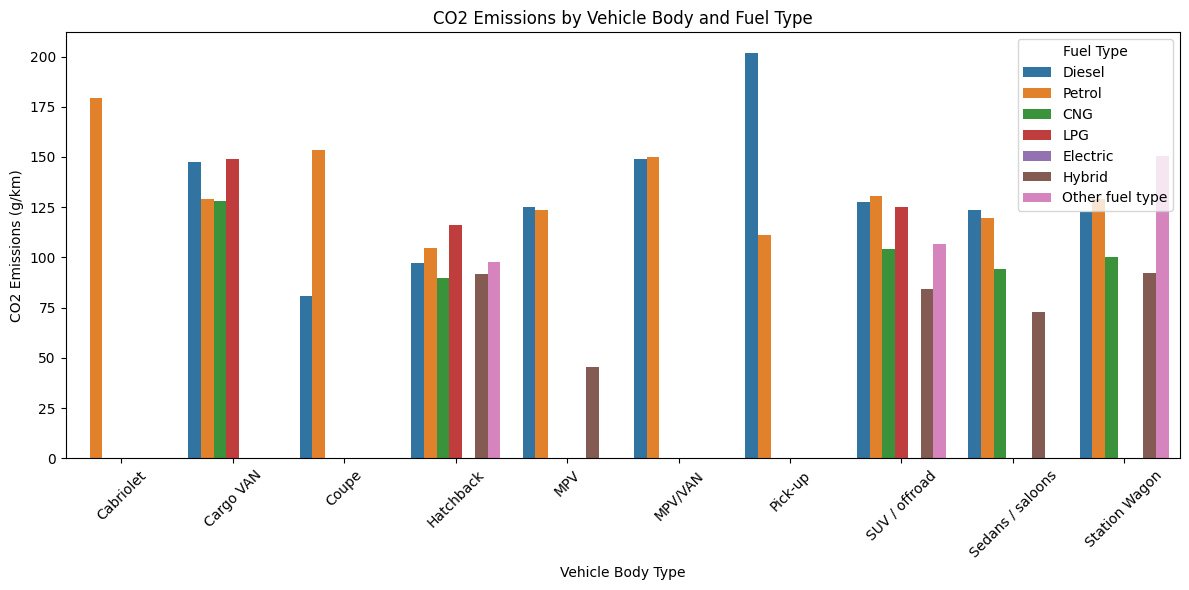

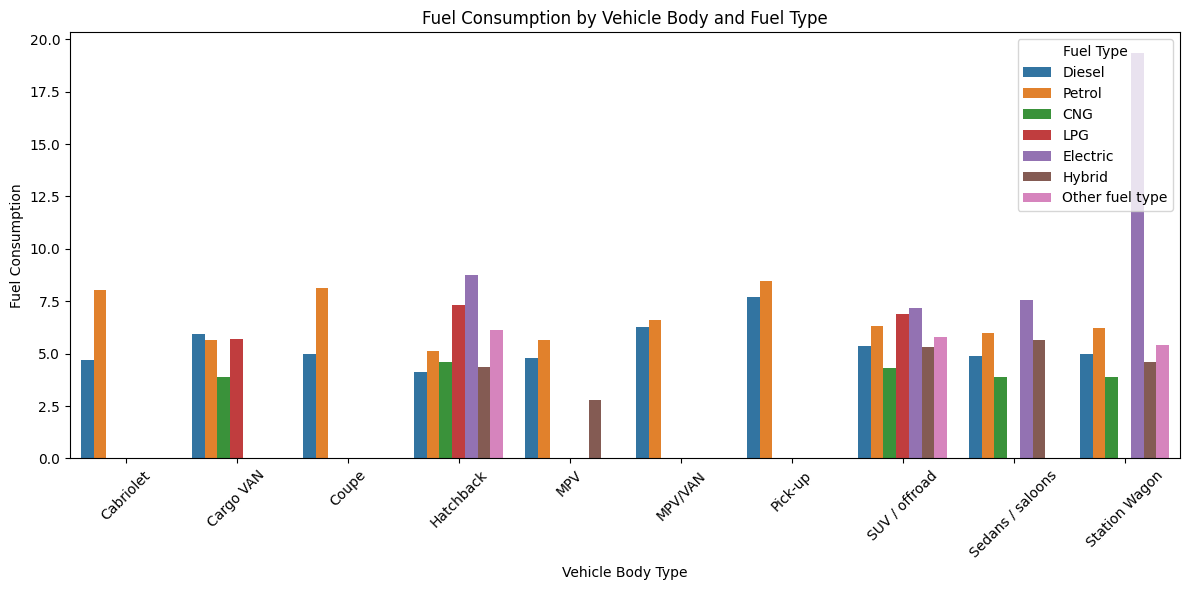

In [22]:
# Reset index to make 'Body' and 'Fuel' columns accessible for plotting
grouped_data = grouped_data.reset_index()

# Plotting CO2 emissions by body and fuel type
plt.figure(figsize=(12, 6))
sns.barplot(x='Body', y='CO2 emissions(g/km)', hue='Fuel', data=grouped_data)
plt.title('CO2 Emissions by Vehicle Body and Fuel Type')
plt.xlabel('Vehicle Body Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

# Plotting fuel consumption by body and fuel type
plt.figure(figsize=(12, 6))
sns.barplot(x='Body', y='Consumption(l/100km or kWh/100km)', hue='Fuel', data=grouped_data)
plt.title('Fuel Consumption by Vehicle Body and Fuel Type')
plt.xlabel('Vehicle Body Type')
plt.ylabel('Fuel Consumption')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

**Comment:**
- SUV Offroad and Pickup trucks exhibit higher CO2 emissions and fuel consumption compared to other vehicle types.
- Electric cars show significantly lower CO2 emissions and lower fuel consumption, reflecting their energy efficiency and lower environmental impact compared to fossil fuel-powered vehicles.
- Hybrid and Electric vehicles stand out for their low emissions and high energy efficiency on both charts.